<a href="https://colab.research.google.com/github/lauratobon/ai-digit-recognizer/blob/main/01_generate_data_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import files from Kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "."
!kaggle competitions download -c digit-recognizer
!unzip digit-recognizer.zip

 85% 13.0M/15.3M [00:00<00:00, 67.9MB/s]
100% 15.3M/15.3M [00:00<00:00, 74.1MB/s]
Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [ ]:
#Read the files and have them in memory
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.head()

print("train shape: ",train.shape)
print("test shape: ",test.shape)

train shape:  (42000, 785)
test shape:  (28000, 784)


In [ ]:
print(train['label'].unique())
print(train['label'].nunique())

[1 0 4 7 3 5 8 9 2 6]
10


In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train.iloc[:,:1]
x_train = train.iloc[:,1:]
x_test = test
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (42000, 784)
y_train shape:  (42000, 1)
x_test shape:  (28000, 784)


In [ ]:
#Normalize data

x_train = x_train/255.
x_test  = x_test/255.

#Reshape images

x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

#One-hot encoding

num_classes=10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (42000, 28, 28, 1)
y_train shape:  (42000, 10)
x_test shape:  (28000, 28, 28, 1)


In [ ]:
print(x_train.ndim)

4


In [ ]:
#Printing original labels of top 5 rows
print(train['label'].head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [ ]:
#One hot encoding of the same labels
print(y_train[0:5,:])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


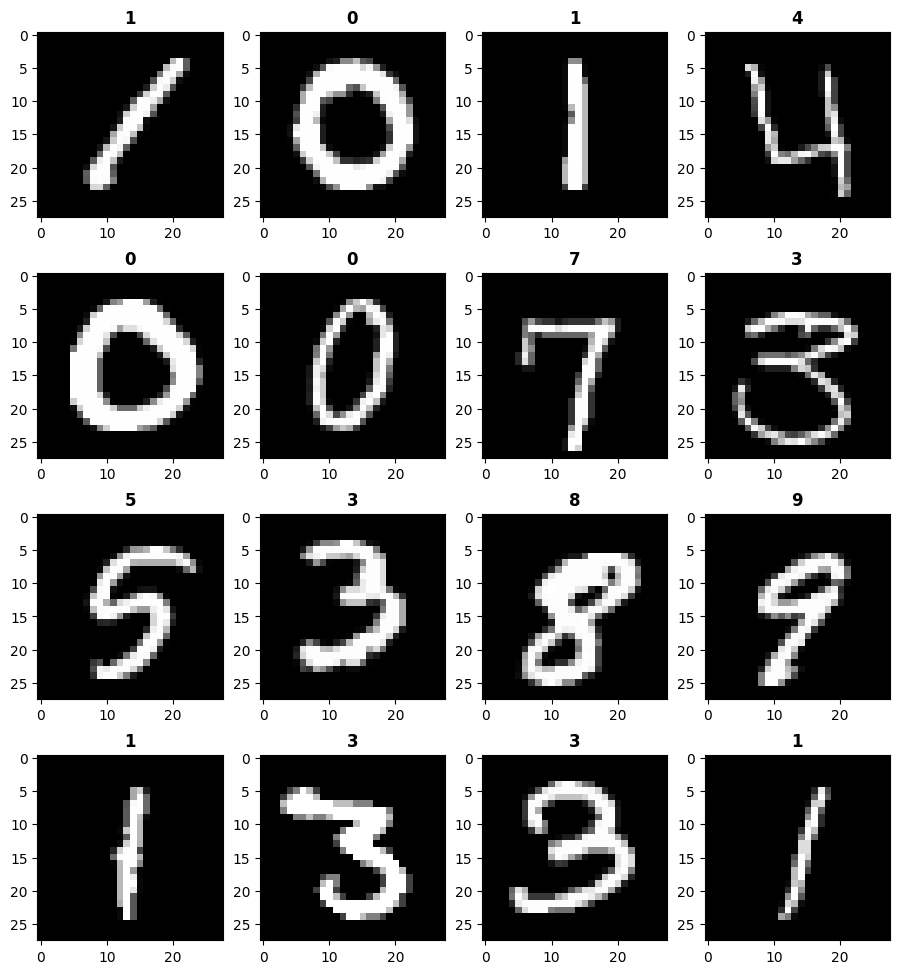

In [ ]:
fig = plt.figure(figsize = (11, 12))

for i in range(16):
    plt.subplot(4,4,1 + i)
    plt.title(np.argmax(y_train[i]),fontname="Aptos",fontweight="bold")
    plt.imshow(x_train[i,:,:,0], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#Defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                   

In [ ]:
#Defining the callback function to stop our training once the acceptable accuracy is reached
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.9):
                print("\nReached 90% accuracy so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()

In [ ]:
#Compiling and model training with batch size = 256, epochs = 100, and optimizer = adam
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            name='Adam'
)
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 256, epochs = 100, callbacks=[callbacks])

Epoch 1/100
165/165 [==============================] - 112s 666ms/step - loss: 0.6826 - accuracy: 0.7675
Epoch 2/100
164/165 [============================>.] - ETA: 0s - loss: 0.1349 - accuracy: 0.9601
Reached 99.9% accuracy so cancelling training!
165/165 [==============================] - 109s 662ms/step - loss: 0.1349 - accuracy: 0.9601


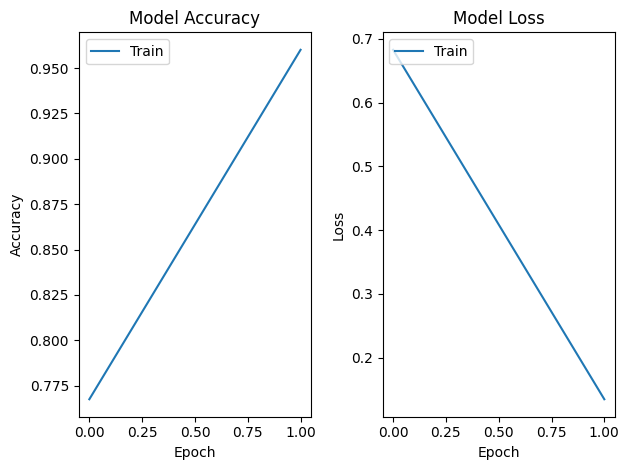

In [ ]:
# Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Show the graphic
plt.tight_layout()
plt.show()


In [ ]:
#Saving the model to be used in the predict file
import pickle
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Guardar el modelo en Google Drive
with open('/content/drive/My Drive/model.pkl', 'wb') as f:
    pickle.dump(model, f)

Mounted at /content/drive
